In [2]:
import pandas as pd

df = pd.read_csv("dataset_kualitas_kopi.csv")

df

,Kadar Kafein,Tingkat Keasaman,Jenis Proses,Kualitas Kopi
0,71.676050,4.505419,Honey,Buruk
1,89.899105,4.777716,Honey,Buruk
2,101.782740,5.987926,Washed,Sedang
3,112.958351,5.145615,Natural,Baik
4,68.571363,4.934300,Honey,Buruk
...,...,...,...,...
295,105.346259,5.511636,Washed,Sedang
296,114.917455,5.150439,Natural,Baik
297,99.558838,5.612135,Washed,Sedang
298,88.621531,4.803087,Honey,Buruk


In [3]:
df.head()

,Kadar Kafein,Tingkat Keasaman,Jenis Proses,Kualitas Kopi
0,71.676050,4.505419,Honey,Buruk
1,89.899105,4.777716,Honey,Buruk
2,101.782740,5.987926,Washed,Sedang
3,112.958351,5.145615,Natural,Baik
4,68.571363,4.934300,Honey,Buruk


In [4]:
df.tail()

,Kadar Kafein,Tingkat Keasaman,Jenis Proses,Kualitas Kopi
295,105.346259,5.511636,Washed,Sedang
296,114.917455,5.150439,Natural,Baik
297,99.558838,5.612135,Washed,Sedang
298,88.621531,4.803087,Honey,Buruk
299,98.192872,5.504599,Washed,Sedang


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kadar Kafein      300 non-null    float64
 1   Tingkat Keasaman  300 non-null    float64
 2   Jenis Proses      300 non-null    object 
 3   Kualitas Kopi     300 non-null    object 
dtypes: float64(2), object(2)
memory usage: 9.5+ KB


In [6]:
df.describe()

,Kadar Kafein,Tingkat Keasaman
count,300.000000,300.000000
mean,94.880478,5.255010
std,18.612343,0.423348
min,60.340609,4.505419
25%,80.885090,4.912739
50%,96.469407,5.249464
75%,108.570401,5.622462
max,129.569514,5.995027


In [8]:
df.shape

(300, 4)

In [9]:
df["Kualitas Kopi"].value_counts()

Kualitas Kopi
Baik      103
Buruk      99
Sedang     98
Name: count, dtype: int64

In [10]:
df["Jenis Proses"].value_counts()

Jenis Proses
Natural    103
Honey      101
Washed      96
Name: count, dtype: int64

In [13]:
df.columns

Index(['Kadar Kafein', 'Tingkat Keasaman', 'Jenis Proses', 'Kualitas Kopi'], dtype='object')

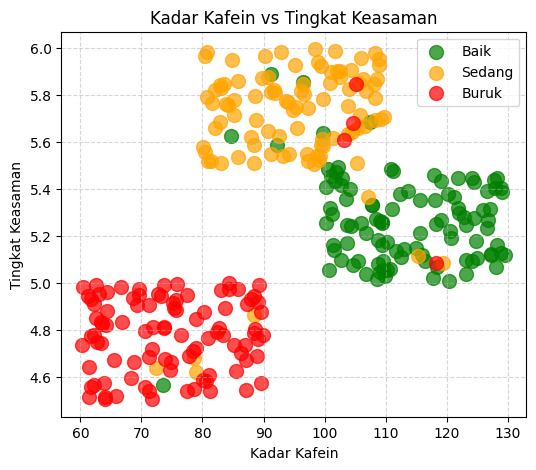

In [46]:
import matplotlib.pyplot as plt

baik = df[df["Kualitas Kopi"]=="Baik"]
sedang = df[df["Kualitas Kopi"]=="Sedang"]
buruk = df[df["Kualitas Kopi"]=="Buruk"]

plt.figure(figsize=(6,5))

plt.scatter(baik["Kadar Kafein"], baik["Tingkat Keasaman"], s=100, alpha=0.7, color="green", label="Baik")
plt.scatter(sedang["Kadar Kafein"], sedang["Tingkat Keasaman"], s=100, alpha=0.7, color="orange", label="Sedang")
plt.scatter(buruk["Kadar Kafein"], buruk["Tingkat Keasaman"], s=100, alpha=0.7, color="red", label="Buruk")

plt.xlabel("Kadar Kafein")
plt.ylabel("Tingkat Keasaman")
plt.title("Kadar Kafein vs Tingkat Keasaman")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# siapkan bahannya

X = df[["Kadar Kafein", "Tingkat Keasaman", "Jenis Proses"]]
y = df["Kualitas Kopi"]

# pisahkan dataset untuk train dan test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 4
)

# tuliskan kolom angka dan kategorinya apa saja

numeric_columns = ["Kadar Kafein", "Tingkat Keasaman"]
categorical_columns = ["Jenis Proses"]

# siapkan pemrosesan awal (preprocessing)
preprocessing = ColumnTransformer(
    transformers =[
        ("scaler", StandardScaler(), numeric_columns),
        ("onehot", OneHotEncoder(), categorical_columns)
    ]
)

# siapkan pipeline
model = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", LogisticRegression())
    ]
)

# suruh model alias otak untuk belajar

model.fit(X_train, y_train)

# suruh otak ulangan, catat hasil jawabannya
y_pred = model.predict(X_test)

# bandingkan kunci jawaban dengan jawaban otak
print("Akurasi : ", accuracy_score(y_test, y_pred))

print("\nClassification Report\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix\n", confusion_matrix(y_test, y_pred))

Akurasi :  0.9166666666666666

Classification Report
               precision    recall  f1-score   support

        Baik       0.89      0.89      0.89        19
       Buruk       1.00      0.95      0.97        20
      Sedang       0.86      0.90      0.88        21

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60


Confusion Matrix
 [[17  0  2]
 [ 0 19  1]
 [ 2  0 19]]


In [65]:
data_baru = pd.DataFrame([[110, 4.5, "Honey"]], columns =["Kadar Kafein", "Tingkat Keasaman", "Jenis Proses"])

prediksi = model.predict(data_baru),[0]
presentase = max (model.predict_proba(data_baru)[0])
print(f"Prediksi {prediksi} dengan tingkat keyakinan {presentase*100:.2f}%")

Prediksi (array(['Baik'], dtype=object), [0]) dengan tingkat keyakinan 51.12%


In [67]:
import joblib 

joblib.dump(model, "model_kualitas_kopi.joblib")

['model_kualitas_kopi.joblib']